In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [34]:
# Question 1
#  a. Import the given “Salary_Data.csv”
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [35]:
# b.Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=1/3,random_state = 0)

In [36]:
# c. Train and predict the model
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

Y_Pred = regressor.predict(X_Test)

In [37]:
# d. Calculate the mean_squared error
mean_squared_error(Y_Test,Y_Pred)

21026037.329511296

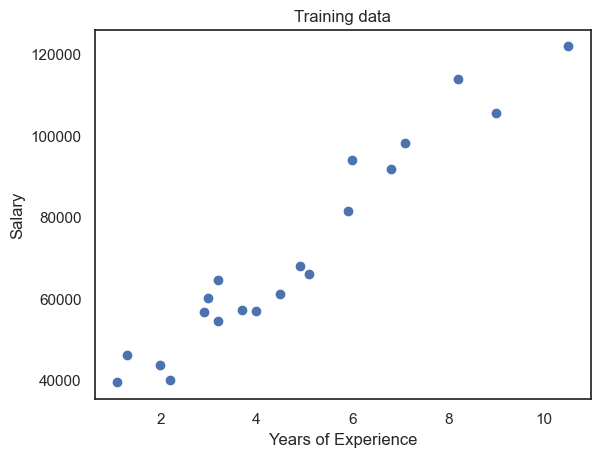

In [38]:
# e. Visualizing training data using scatter plot
plt.title('Training data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Train, Y_Train)
plt.show()

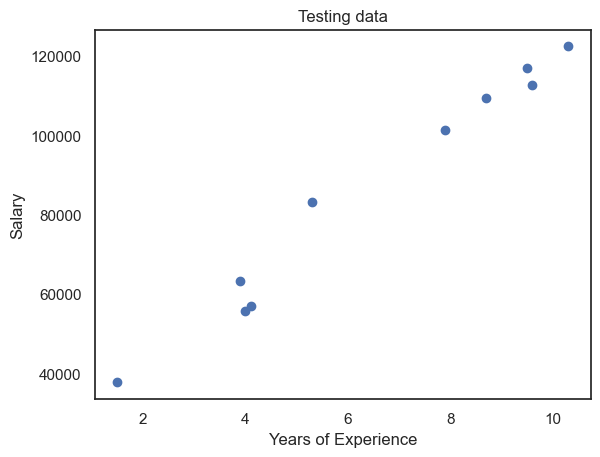

In [39]:
# e. Visualizing testing data using scatter plot
plt.title('Testing data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Test, Y_Test)
plt.show()

In [40]:
# Question 2
# . Apply K means clustering in the dataset provided:
df2=pd.read_csv("K-Mean_Dataset.csv")
df2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [41]:
# Remove any null values by the mean

X = df2.iloc[:,1:].values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
x = imputer.transform(X)

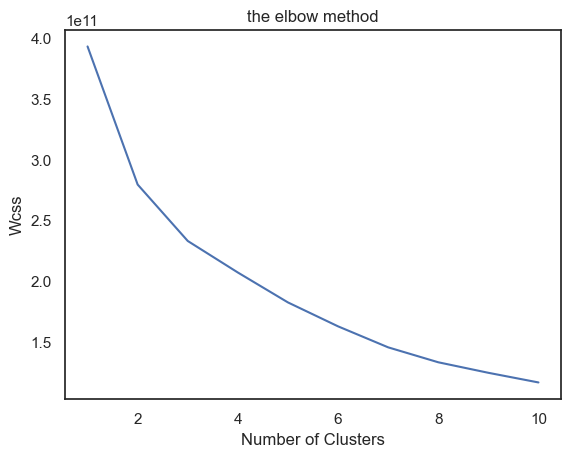

In [42]:
# Use the elbow method to find a good number of clusters with the K-Means algorithm
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [65]:
from sklearn.cluster import KMeans
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(x)

KMeans(n_clusters=2)

In [66]:
# Calculate the silhouette score for the above clustering

y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print('Silhouette score:',score)

Silhouette score: 0.511639269641848


In [54]:
# Question 3
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array)

In [55]:
from sklearn.cluster import KMeans
nclusters = 2 
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

KMeans(n_clusters=2)

In [56]:
y_scaled_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_scaled_cluster_kmeans)
print('Silhouette score after applying scaling:',score)

Silhouette score after applying scaling: 0.2100360340780558


In [ ]:
# The silhoute score before scaling is 0.51 and after that we are scalling the features and again fitting the data. 
# Here the data is stored in x_scaled. Then the silhouette score after scaling is o.21 . 
# Therefore the silhouette score decreased after scaling.